# 4. Prediction

In [64]:
from transformers import AutoModelForCTC

# loading for inference
ft_model = AutoModelForCTC.from_pretrained(FT_ASR_MODEL)

loading configuration file wav2vec2-large-960h-cv\config.json
Model config Wav2Vec2Config {
  "_name_or_path": "wav2vec2-large-960h-cv",
  "activation_dropout": 0.1,
  "adapter_kernel_size": 3,
  "adapter_stride": 2,
  "add_adapter": false,
  "apply_spec_augment": true,
  "architectures": [
    "Wav2Vec2ForCTC"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "codevector_dim": 256,
  "contrastive_logits_temperature": 0.1,
  "conv_bias": false,
  "conv_dim": [
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "conv_kernel": [
    10,
    3,
    3,
    3,
    3,
    2,
    2
  ],
  "conv_stride": [
    5,
    2,
    2,
    2,
    2,
    2,
    2
  ],
  "ctc_loss_reduction": "sum",
  "ctc_zero_infinity": false,
  "diversity_loss_weight": 0.1,
  "do_stable_layer_norm": false,
  "eos_token_id": 2,
  "feat_extract_activation": "gelu",
  "feat_extract_dropout": 0.0,
  "feat_extract_norm": "group",
  "feat_proj_dropout": 0.1,
  "feat_qua

## 4.1. Processing Test Data
(Similar to procedure done in Training Notebook) 

In [ ]:
BASE_PATH = "YOUR_BASE_PATH" 

AUDIO_TEST_DIR = "BASE_PATH\common_voice\cv-valid-test"
CSV_TEST_FILE = "BASE_PATH\common_voice\cv-valid-test.csv"

In [85]:
test_data_df = pd.read_csv(CSV_TEST_FILE)
test_data_df

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,NaN,NaN,NaN,NaN
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN
2,cv-valid-test/sample-000002.mp3,and you know it,1,0,NaN,NaN,NaN,NaN
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,1,0,NaN,NaN,NaN,NaN
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,2,1,NaN,NaN,NaN,NaN
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,3,0,NaN,NaN,NaN,NaN
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,3,0,NaN,NaN,NaN,NaN


In [86]:
# Create an empty dataframe
test_df = pd.DataFrame() 
test_df["filename"] = test_data_df["filename"]
test_df["text"] = test_data_df["text"]
test_df

,filename,text
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless
1,cv-valid-test/sample-000001.mp3,i've got to go to him
2,cv-valid-test/sample-000002.mp3,and you know it
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...
...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated


In [87]:
# assuming whole notebook is run in one instance, calling functions from Part 1 here
test_df['audio'] = test_df['filename'].map(lambda x: preprocess_audio(AUDIO_TEST_DIR, x))
test_df

C:\Users\jared\Downloads\common_voice\cv-valid-test
cv-valid-test/sample-000000.mp3
Loading audio from: C:\Users\jared\Downloads\common_voice\cv-valid-test\cv-valid-test/sample-000000.mp3
[ 3.8050308e-23 -3.7223128e-24  0.0000000e+00 ...  2.0281236e-06
  1.9477056e-07  3.8479739e-06]
16000
C:\Users\jared\Downloads\common_voice\cv-valid-test
cv-valid-test/sample-000001.mp3
Loading audio from: C:\Users\jared\Downloads\common_voice\cv-valid-test\cv-valid-test/sample-000001.mp3
[ 8.1854523e-12 -1.8189894e-11 -2.9103830e-11 ...  2.1212036e-05
 -1.2093107e-05 -2.1796674e-05]
16000
C:\Users\jared\Downloads\common_voice\cv-valid-test
cv-valid-test/sample-000002.mp3
Loading audio from: C:\Users\jared\Downloads\common_voice\cv-valid-test\cv-valid-test/sample-000002.mp3
[ 4.3655746e-11  5.0931703e-11 -1.1641532e-10 ... -6.2168227e-04
 -5.5417768e-05 -4.3233915e-04]
16000
C:\Users\jared\Downloads\common_voice\cv-valid-test
cv-valid-test/sample-000003.mp3
Loading audio from: C:\Users\jared\Download

,filename,text,audio
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,"[3.8050308e-23, -3.7223128e-24, 0.0, -3.825710..."
1,cv-valid-test/sample-000001.mp3,i've got to go to him,"[8.185452e-12, -1.8189894e-11, -2.910383e-11, ..."
2,cv-valid-test/sample-000002.mp3,and you know it,"[4.3655746e-11, 5.0931703e-11, -1.1641532e-10,..."
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,"[1.0913936e-11, -1.8189894e-12, -1.8189894e-12..."
...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,"[4.7433845e-20, -8.944668e-19, -3.5575384e-19,..."
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,"[5.820766e-10, -2.6193447e-10, -5.820766e-10, ..."
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,"[5.684342e-14, -9.379164e-13, -6.536993e-13, 5..."


In [89]:
# Convert the pandas DataFrame to a Hugging Face Dataset
test_ds = Dataset.from_pandas(test_df) 
test_ds = test_ds.map(remove_special_characters)
test_ds = test_ds.map(prepare_dataset) 
test_ds

Map:   0%|          | 0/3995 [00:00<?, ? examples/s]

Map:   0%|          | 0/3995 [00:00<?, ? examples/s]

C:\Users\jared\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\models\wav2vec2\processing_wav2vec2.py:155: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


Dataset({
    features: ['filename', 'text', 'audio', 'input_values', 'labels'],
    num_rows: 3995
})

# 4.2. Inference

In [90]:
# Put the model in evaluation mode
ft_model.eval() 

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [93]:
def inference_result(batch):
  with torch.no_grad():
    input_values = torch.tensor(batch["input_values"]).unsqueeze(0)
    logits = model(input_values).logits

  pred_ids = torch.argmax(logits, dim=-1)
  batch["pred_str"] = processor.batch_decode(pred_ids)[0]
  batch["text"] = processor.decode(batch["labels"], group_tokens=False)
  
  return batch

In [94]:
test_results = test_ds.map(inference_result)
test_results

Map:   0%|          | 0/3995 [00:00<?, ? examples/s]

Dataset({
    features: ['filename', 'text', 'audio', 'input_values', 'labels', 'pred_str'],
    num_rows: 3995
})

In [97]:
idx = 53
print(f"Text: {test_results[idx]['text']}")
print(f"Prediction: {test_results[idx]['pred_str']}") 

Text: OF COURSE THE TWO WERE UNABLE TO DO ANYTHING
Prediction: OF COURSE THE TWO WERE UNABLE TO DO ANYTHING


In [99]:
selected_columns = ['filename', 'text', 'pred_str']

all_results_df = test_results.to_pandas() 
results_df = all_results_df[selected_columns]
results_df

,filename,text,pred_str
0,cv-valid-test/sample-000000.mp3,WITHOUT THE DATASET THE ARTICLE IS USELESS,WITHOUT THE DAT ASS ET THE ARTICLES USELESS
1,cv-valid-test/sample-000001.mp3,I'VE GOT TO GO TO HIM,I'VE GAT TO GO TO HIM
2,cv-valid-test/sample-000002.mp3,AND YOU KNOW IT,AND YOU KNOW IT
3,cv-valid-test/sample-000003.mp3,DOWN BELOW IN THE DARKNESS WERE HUNDREDS OF PE...,DOWN BELOW IN THE DARKNESS WERE HUNDREDS OF PE...
4,cv-valid-test/sample-000004.mp3,HOLD YOUR NOSE TO KEEP THE SMELL FROM DISABLIN...,HOLD YOUR NOSE TO KEEP THE SMELL FROM DISABLIN...
...,...,...,...
3990,cv-valid-test/sample-003990.mp3,THE OLD MAN OPENED HIS CAPE AND THE BOY WAS ST...,THE OLD MAN OPENED HIS CAPE AND THE BOY WAS ST...
3991,cv-valid-test/sample-003991.mp3,IN ALCHEMY IT'S CALLED THE SOUL OF THE WORLD,AN ARCHIME HADS CAUGHT THE SOUL OF THE WORLD
3992,cv-valid-test/sample-003992.mp3,AT THAT POINT IN THEIR LIVES EVERYTHING IS CLE...,AT THAT POINT IN THEIR LIVES EVERYTHING IS CLE...
3993,cv-valid-test/sample-003993.mp3,HE TOLD THEM ALL TO BE SEATED,HE TOLD THEM ALL TO BE SEATED


In [100]:
results_df.to_csv("test_results.csv")

# 4.3. Results Processing

In [101]:
# Calculate WER for each row
results_df['wer'] = results_df.apply(lambda row: wer_metric.compute(predictions=[row['pred_str']], 
                                                                    references=[row['text']]), 
                                                                    axis=1) 

results_df

C:\Users\jared\AppData\Local\Temp\ipykernel_10332\758498177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['wer'] = results_df.apply(lambda row: wer_metric.compute(predictions=[row['pred_str']],


,filename,text,pred_str,wer
0,cv-valid-test/sample-000000.mp3,WITHOUT THE DATASET THE ARTICLE IS USELESS,WITHOUT THE DAT ASS ET THE ARTICLES USELESS,0.714286
1,cv-valid-test/sample-000001.mp3,I'VE GOT TO GO TO HIM,I'VE GAT TO GO TO HIM,0.166667
2,cv-valid-test/sample-000002.mp3,AND YOU KNOW IT,AND YOU KNOW IT,0.000000
3,cv-valid-test/sample-000003.mp3,DOWN BELOW IN THE DARKNESS WERE HUNDREDS OF PE...,DOWN BELOW IN THE DARKNESS WERE HUNDREDS OF PE...,0.000000
4,cv-valid-test/sample-000004.mp3,HOLD YOUR NOSE TO KEEP THE SMELL FROM DISABLIN...,HOLD YOUR NOSE TO KEEP THE SMELL FROM DISABLIN...,0.083333
...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,THE OLD MAN OPENED HIS CAPE AND THE BOY WAS ST...,THE OLD MAN OPENED HIS CAPE AND THE BOY WAS ST...,0.000000
3991,cv-valid-test/sample-003991.mp3,IN ALCHEMY IT'S CALLED THE SOUL OF THE WORLD,AN ARCHIME HADS CAUGHT THE SOUL OF THE WORLD,0.444444
3992,cv-valid-test/sample-003992.mp3,AT THAT POINT IN THEIR LIVES EVERYTHING IS CLE...,AT THAT POINT IN THEIR LIVES EVERYTHING IS CLE...,0.000000
3993,cv-valid-test/sample-003993.mp3,HE TOLD THEM ALL TO BE SEATED,HE TOLD THEM ALL TO BE SEATED,0.000000


2 forms of analysis are used, qualitiative and quantitative:
1. Quantitative - using WER metric on results
2. Qualitiative - manual inspection of outputs

## 4.3.1. Quantiative

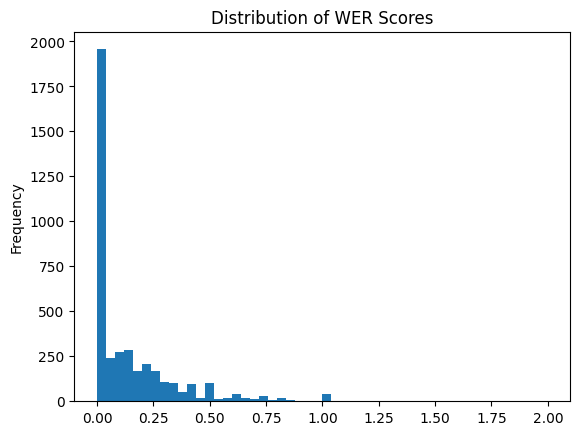

In [102]:
# Plot the distribution of WER scores
results_df['wer'].plot.hist(bins=50, title="Distribution of WER Scores", xlabel="WER", ylabel="Frequency") 

# Show the plot
plt.show() 

In [113]:
# Get descriptive statistics for the 'wer' column
wer_stats = results_df['wer'].describe()
wer_stats

count    3995.000000
mean        0.137106
std         0.205480
min         0.000000
25%         0.000000
50%         0.062500
75%         0.200000
max         2.000000
Name: wer, dtype: float64

Observations:
- (Bar chart) Knowing WER scores are the lower the better, it is observed from the above distributions that the scores skew to the left, aka towards 0, which shows a decent performance by the ASR
- (Bar chart) Notably, a significant portion of records are in the lowest bin towards 0, showing the model has performed well in the transcription prediction task 
- Also from WER statistics, it acts as supporting evidence that the distribution is skewed to the left: with the mean being 0.13, the 50-percentile being 0.06 (< 0.1), and 75-percentile being 0.20; these support that the model has performed well in the transcription prediction task

## 4.3.2. Qualitative

Given large dataset output, Qualitative analysis is done via random sampling.

In [112]:
# Get the number of rows in the DataFrame
num_rows = len(results_df)

# Define the number of rows to select
num_samples = 10  

# Create a list of random indices
random_indices = random.sample(range(num_rows), num_samples)

# Select the random rows from the DataFrame
random_rows_df = results_df.iloc[random_indices]

# Print the selected rows
random_rows_df

,filename,text,pred_str,wer
2413,cv-valid-test/sample-002413.mp3,IT SORT OF MAKES A FELLOW LOSE FAITH IN HIMSELF,IT SORT OF MAKES A FELLOW LOSE FAITH IN HIMSELF,0.000000
1139,cv-valid-test/sample-001139.mp3,WHAT AM I GOING TO SAY TO ELVIS,WHAT AM I GOING TO SAY TO ALVIS,0.125000
3315,cv-valid-test/sample-003315.mp3,THE TRAIN PULLED INTO THE STATION,THE TRAIN PULLED INTO THE STATION,0.000000
3560,cv-valid-test/sample-003560.mp3,HE HAD FOUND WHERE HIS TREASURE WAS AND WAS FR...,HE HAD FOUND WHERE HIS TREASURE WAS AND WAS FR...,0.000000
26,cv-valid-test/sample-000026.mp3,YOU'LL TAKE FIFTY AND LIKE IT,YOU'LL TAKE FIFTY AND LIKE IT,0.000000
3108,cv-valid-test/sample-003108.mp3,MY CHINCHILLA EATS BREAD,MICHINCHILLA EATS BREAD,0.500000
3300,cv-valid-test/sample-003300.mp3,HE FOLLOWED THE MOVEMENT OF THE BIRDS TRYING T...,HE FOLLOWED THE MOVEMENT OF THE BIRDS TRYING T...,0.000000
653,cv-valid-test/sample-000653.mp3,HE SHOULD HAVE DECIDED TO BECOME A SHEPHERD TH...,HE SHOULD HAVE DECIDED TO BECOME A SHEPHERD TH...,0.000000
2859,cv-valid-test/sample-002859.mp3,ANY TIME BUT CHRISTMAS,ANY TIME BUT CHRISTMAS,0.000000
1731,cv-valid-test/sample-001731.mp3,BUT HE KEPT QUIET BECAUSE HE HAD HEARD WHAT TH...,BUT HE KEPT QUIET BECAUSE HE HAD HEARD WHAT TH...,0.066667


Observations:
- Randomly sampled records look very decent, with a handful being exact matches
- Otherwise they contain mild differences, eg 'ELVIS' vs 'ALVIS' (Row number 1139)